In [715]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import datetime

In [716]:
# read from Bereiter data 
# https://sparkbyexamples.com/pandas/pandas-read-excel-multiple-sheets-in-pandas/
bereiter_df = pd.read_excel('data\co2\grl52461-sup-0003-supplementary.xls', 
                            sheet_name='CO2 Composite')

# Create a subset of the DataFrame (selecting all rows starting from the 14th row and all columns)
ber_df = bereiter_df.iloc[13:]
# drop the index columns
# https://datagy.io/pandas-drop-index-column/
ber_df = ber_df.reset_index(drop=True)

# use first rows as an header 
# https://saturncloud.io/blog/how-to-set-column-headers-to-the-first-row-in-a-pandas-dataframe-a-comprehensive-guide/
ber_df.columns = ber_df.iloc[0]

# Drop the first row (header row) 
ber_df = ber_df.iloc[1:]

ber_df 


,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
1,-51.03,368.022488,0.060442
2,-48,361.780737,0.37
3,-46.279272,359.647793,0.098
4,-44.405642,357.10674,0.159923
5,-43.08,353.946685,0.043007
...,...,...,...
1897,803925.284376,202.921723,2.064488
1898,804009.870607,207.498645,0.915083
1899,804522.67463,204.861938,1.642851
1900,805132.442334,202.226839,0.689587


In [717]:
#change the datatype on flaot64 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
ber_df = ber_df.astype('float64')

# Remove leading and trailing spaces from column names
ber_df.columns = ber_df.columns.str.strip()

In [718]:
# add a new columns "Year" showing the corrent year.
# define the current year
current_year = datetime.date.today().year
# present is equal to 1950
ber_df['Year'] = 1950 - ber_df['Gasage (yr BP)'].astype(int)
# fix the Gasage (yr BP) to express as a present date the 2023
ber_df['ECD3_bp'] =  current_year - 1950 + ber_df['Gasage (yr BP)']
# drop Gasage (yr BP) columns 
ber_df = ber_df.drop('Gasage (yr BP)', axis=1)

In [719]:
ber_df

,CO2 (ppmv),sigma mean CO2 (ppmv),Year,ECD3_bp
1,368.022488,0.060442,2001,21.970000
2,361.780737,0.370000,1998,25.000000
3,359.647793,0.098000,1996,26.720728
4,357.106740,0.159923,1994,28.594358
5,353.946685,0.043007,1993,29.920000
...,...,...,...,...
1897,202.921723,2.064488,-801975,803998.284376
1898,207.498645,0.915083,-802059,804082.870607
1899,204.861938,1.642851,-802572,804595.674630
1900,202.226839,0.689587,-803182,805205.442334


In [720]:
# reorder columns index 
#https://practicaldatascience.co.uk/data-science/how-to-reorder-pandas-dataframe-columns

ber_df = ber_df.reindex(columns=['Year', 'ECD3_bp',	'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'])

# sort the value based on the year column 
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

ber_df = ber_df.sort_values(by='Year', ascending=False)

In [721]:
# check for duplicate in the columns ECD3_bp
# https://www.statology.org/pandas-find-duplicates/
duplicate_in_year = ber_df.duplicated(['ECD3_bp'], keep=False)
print(ber_df[duplicate_in_year])


Empty DataFrame
Columns: [Year, ECD3_bp, CO2 (ppmv), sigma mean CO2 (ppmv)]
Index: []


In [722]:
# Checking missing values
# https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd
print("Missing Values")
print(ber_df.isnull().sum(), "\n")

# Checking data shape
# https://stackoverflow.com/questions/58008120/how-to-use-format-in-python-to-print-out-the-data-shape
print("Dataset Shape:")
print(f'Rows {ber_df.shape[0]}, Columns: {ber_df.shape[1]}')


Missing Values
0
Year                     0
ECD3_bp                  0
CO2 (ppmv)               0
sigma mean CO2 (ppmv)    0
dtype: int64 

Dataset Shape:
Rows 1901, Columns: 4


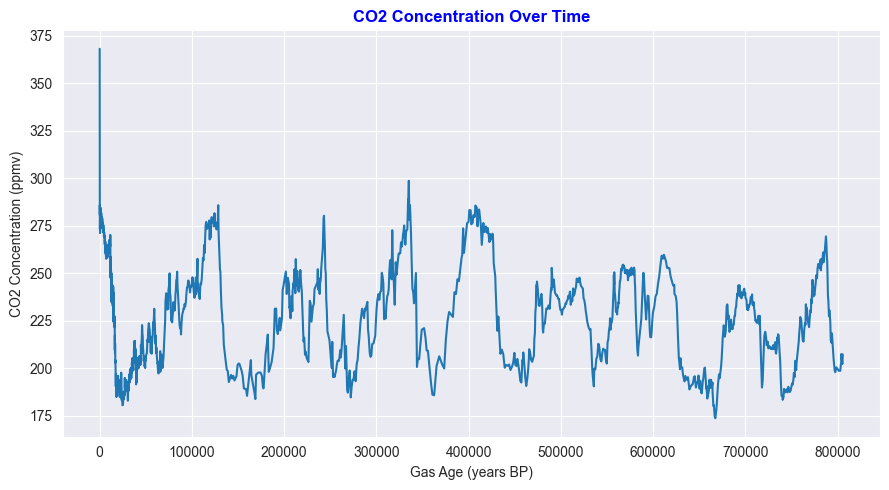

In [723]:
# plot the CO2 (ppmv) vs Gasage (yr BP)

# Set the style
sns.set_style("darkgrid")

# Set the size of the figure
plt.figure(figsize=(9, 5))

# Create the line plot
sns.lineplot(x='ECD3_bp', y='CO2 (ppmv)', data=ber_df)

# Add labels and title
plt.xlabel('Gas Age (years BP)')
plt.ylabel('CO2 Concentration (ppmv)')
plt.title('CO2 Concentration Over Time', fontweight='bold', color='blue')

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()



In [724]:
ber_df

,Year,ECD3_bp,CO2 (ppmv),sigma mean CO2 (ppmv)
1,2001,21.970000,368.022488,0.060442
2,1998,25.000000,361.780737,0.370000
3,1996,26.720728,359.647793,0.098000
4,1994,28.594358,357.106740,0.159923
5,1993,29.920000,353.946685,0.043007
...,...,...,...,...
1897,-801975,803998.284376,202.921723,2.064488
1898,-802059,804082.870607,207.498645,0.915083
1899,-802572,804595.674630,204.861938,1.642851
1900,-803182,805205.442334,202.226839,0.689587


In [725]:
# read from IPCC dataser
ipcc_data_co2 = pd.read_excel('data/co2/41586_2008_BFnature06949_MOESM31_ESM.xls', 
                            sheet_name='3.  Composite CO2')

# Create a subset of the DataFrame (selecting all rows starting from the 14th row and all columns)
ipcc_df_co2 = ipcc_data_co2.iloc[5:]

# drop the index columns
ipcc_df_co2 = ipcc_df_co2.reset_index(drop=True)

# use first rows as an header 
ipcc_df_co2.columns = ipcc_df_co2.iloc[0]

# Drop the first row (header row) 
ipcc_df_co2 = ipcc_df_co2.iloc[1:]

ipcc_df_co2

,EDC3_gas_a (yr),CO2 (ppmv)
1,137,280.4
2,268,274.9
3,279,277.9
4,395,279.1
5,404,281.9
...,...,...
1092,794608,199.4
1093,795202,195.2
1094,796467,189.3
1095,797099,188.4


In [726]:
#change the datatype on flaot64 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
ipcc_df_co2 = ipcc_df_co2.astype('float64')

# Remove leading and trailing spaces from column names
ipcc_df_co2.columns = ipcc_df_co2.columns.str.strip()

In [727]:
ipcc_df_co2

,EDC3_gas_a (yr),CO2 (ppmv)
1,137.0,280.4
2,268.0,274.9
3,279.0,277.9
4,395.0,279.1
5,404.0,281.9
...,...,...
1092,794608.0,199.4
1093,795202.0,195.2
1094,796467.0,189.3
1095,797099.0,188.4


In [728]:
# add a new columns "Year" showing the corrent year.
ipcc_df_co2['Year'] = 1950 - ipcc_df_co2['EDC3_gas_a (yr)'].astype(int)
# fix the EDC3_gas_a (yr) to express the present as 2023
ipcc_df_co2['EDC3_gas_a (yr)'] = 2023 - 1950 + ipcc_df_co2['EDC3_gas_a (yr)']

# reorder columns index 
first_column = ipcc_df_co2.pop('Year') 
ipcc_df_co2.insert(0, 'Year', first_column) 

# sort the value based on the year column 
ipcc_df_co2 = ipcc_df_co2.sort_values(by='Year', ascending=False)
ipcc_df_co2

,Year,EDC3_gas_a (yr),CO2 (ppmv)
1,1813,210.0,280.4
2,1682,341.0,274.9
3,1671,352.0,277.9
4,1555,468.0,279.1
5,1546,477.0,281.9
...,...,...,...
1092,-792658,794681.0,199.4
1093,-793252,795275.0,195.2
1094,-794517,796540.0,189.3
1095,-795149,797172.0,188.4


In [729]:
ipcc_df_co2

,Year,EDC3_gas_a (yr),CO2 (ppmv)
1,1813,210.0,280.4
2,1682,341.0,274.9
3,1671,352.0,277.9
4,1555,468.0,279.1
5,1546,477.0,281.9
...,...,...,...
1092,-792658,794681.0,199.4
1093,-793252,795275.0,195.2
1094,-794517,796540.0,189.3
1095,-795149,797172.0,188.4


In [730]:
# check for duplicate in the columns Gasage (yr BP)
# https://www.statology.org/pandas-find-duplicates/
duplicate_in_year = ipcc_df_co2.duplicated(['EDC3_gas_a (yr)'], keep=False)
print("Duplicate Value")
print(ipcc_df_co2[duplicate_in_year])

Duplicate Value
0      Year  EDC3_gas_a (yr)  CO2 (ppmv)
532 -407433         409456.0       274.2
531 -407433         409456.0       275.2


In [731]:
#line 532 and 531 are duplicate
# groupby year, EDC3_gas_a (yr) and average the CO2 (ppmv) to remove the duplicate
ipcc_df_co2 = (
    ipcc_df_co2
    .groupby(['Year', 'EDC3_gas_a (yr)'])['CO2 (ppmv)']
    .mean()
    .reset_index()
    .sort_values(by='Year', ascending=False)
)

In [732]:
#reset the index
ipcc_df_co2 = ipcc_df_co2.reset_index(drop=True)

In [733]:
# Checking missing values
# https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd
print("Missing Values")
print(ipcc_df_co2.isnull().sum(), "\n")

# Checking data shape
# https://stackoverflow.com/questions/58008120/how-to-use-format-in-python-to-print-out-the-data-shape
print("Dataset Shape:")
print(f'Rows {ipcc_df_co2.shape[0]}, Columns: {ipcc_df_co2.shape[1]}')

Missing Values
Year               0
EDC3_gas_a (yr)    0
CO2 (ppmv)         0
dtype: int64 

Dataset Shape:
Rows 1095, Columns: 3


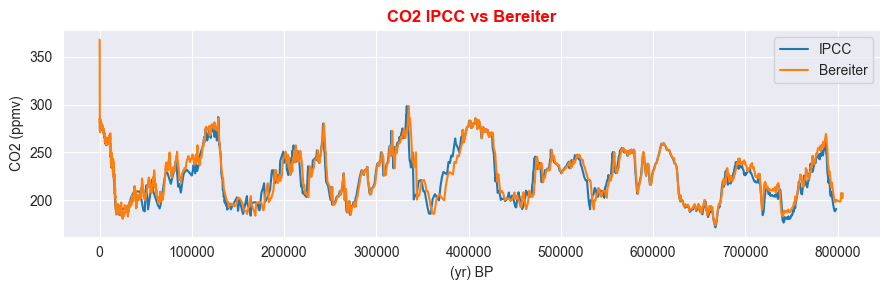

In [734]:
# Set the size of the figure
plt.figure(figsize=(9, 3))

# Create the line plot for IPCC data
sns.lineplot(x='EDC3_gas_a (yr)', y='CO2 (ppmv)', data=ipcc_df_co2, label='IPCC')

# Create the line plot for Bereiter data
sns.lineplot(x='ECD3_bp', y='CO2 (ppmv)', data=ber_df, label='Bereiter')

# Add labels and title
plt.xlabel('(yr) BP')
plt.ylabel('CO2 (ppmv)')
plt.title('CO2 IPCC vs Bereiter', fontweight='bold', color='red')

# Add legend
plt.legend()

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()



In [735]:
# remove last columng of the Bereiter dataser and rename the dataset
co2_df = ber_df.iloc[:, 0:3]
    

In [736]:
co2_df

,Year,ECD3_bp,CO2 (ppmv)
1,2001,21.970000,368.022488
2,1998,25.000000,361.780737
3,1996,26.720728,359.647793
4,1994,28.594358,357.106740
5,1993,29.920000,353.946685
...,...,...,...
1897,-801975,803998.284376,202.921723
1898,-802059,804082.870607,207.498645
1899,-802572,804595.674630,204.861938
1900,-803182,805205.442334,202.226839


In [737]:
# import global co2 mean growth rates of co2 in modern era
# data has bee downloaded from the website https://gml.noaa.gov/ccgg/trends/gl_data.html and added as CSV in the repository

global_co2_moana = pd.read_csv('data\co2\co2_annmean_mlo.csv')

In [738]:
# remove columns not needed 
global_co2_moana = global_co2_moana.iloc[:, 0:2]

global_co2_moana= global_co2_moana.reset_index(drop=True)
# kepp only rows with value from the 1954 ongoing 
global_co2_moana = global_co2_moana.iloc[43:, :]
# drop the index columns 
global_co2_moana = global_co2_moana.reset_index(drop=True)
#set up column name 
global_co2_moana.columns= [ "Year", "C02 (ppm)"]
# Convert the 'C02 (ppm)' column to 'float64'
global_co2_moana['C02 (ppm)'] = global_co2_moana['C02 (ppm)'].astype('float64')
# Convert the 'Year' column to 'int64'
global_co2_moana['Year'] = global_co2_moana['Year'].astype('int64')

In [739]:
global_co2_moana

,Year,C02 (ppm)
0,1959,315.98
1,1960,316.91
2,1961,317.64
3,1962,318.45
4,1963,318.99
...,...,...
59,2018,408.72
60,2019,411.65
61,2020,414.21
62,2021,416.41


In [740]:
global_co2_moana['co2_lag(1)'] = global_co2_moana['C02 (ppm)'].shift(1)

In [741]:
global_co2_moana

,Year,C02 (ppm),co2_lag(1)
0,1959,315.98,NaN
1,1960,316.91,315.98
2,1961,317.64,316.91
3,1962,318.45,317.64
4,1963,318.99,318.45
...,...,...,...
59,2018,408.72,406.76
60,2019,411.65,408.72
61,2020,414.21,411.65
62,2021,416.41,414.21


In [742]:
# calculate increase percentage of co2 for modern era in the moana dataset 

# define current year and last year variable 
current_year = global_co2_moana['C02 (ppm)']
previous_year = global_co2_moana['co2_lag(1)']

# create increase column    
global_co2_moana['%_increase'] = (current_year-previous_year) / previous_year

In [743]:
#https://vitalflux.com/pandas-dataframe-how-to-add-rows-columns/

for i in range(2002, 2023):
    y = 2023 - i
    x = i - 1
    previous_year = co2_df.loc[co2_df["Year"] == x, 'CO2 (ppmv)']
    increase = global_co2_moana.loc[global_co2_moana["Year"] == i, "%_increase"].values[0]
    co2 = previous_year * (1 + increase)
    new_row = pd.DataFrame({'Year': i, 'ECD3_bp': y, 'CO2 (ppmv)': co2})
    co2_df = pd.concat([co2_df, new_row], ignore_index=True)

In [744]:
# sort by year and reset index 
co2_df = co2_df.sort_values(by='Year', ascending=False).reset_index(drop=True)
# check the dataset
co2_df.head(25)

,Year,ECD3_bp,CO2 (ppmv)
0,2022,1.000000,414.813239
1,2021,2.000000,412.712066
2,2020,3.000000,410.531603
3,2019,4.000000,407.994337
4,2018,5.000000,405.090357
5,2017,6.000000,403.147763
6,2016,7.000000,400.818632
7,2015,8.000000,397.448825
8,2014,9.000000,395.268363
9,2013,10.000000,393.216745


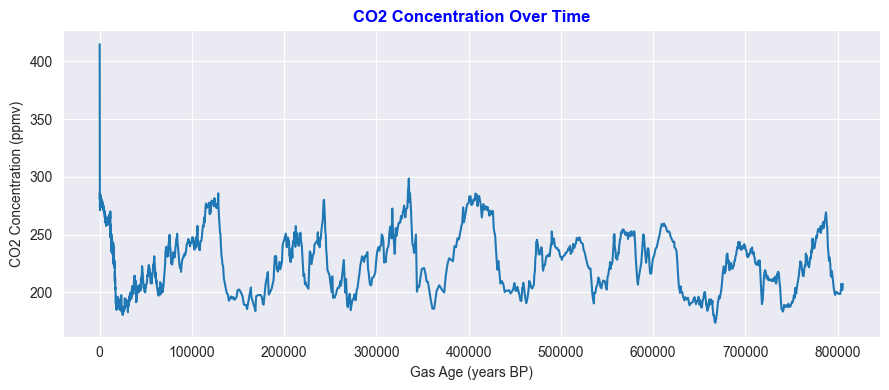

In [745]:
# plot the CO2 (ppmv) vs ECD3_bp

# Set the style
sns.set_style("darkgrid")

# Set the size of the figure
plt.figure(figsize=(9, 4))

# Create the line plot
sns.lineplot(x='ECD3_bp', y='CO2 (ppmv)', data=co2_df)

# Add labels and title
plt.xlabel('Gas Age (years BP)')
plt.ylabel('CO2 Concentration (ppmv)')
plt.title('CO2 Concentration Over Time', fontweight='bold', color='blue')

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()

In [746]:
# from text to csv - temperature 
# https://www.geeksforgeeks.org/convert-text-file-to-csv-using-python-pandas/
# https://stackoverflow.com/questions/19632075/how-to-read-file-with-space-separated-values-in-pandas

noaa_temperature = pd.read_csv("data\Temperature\edc3deuttemp2007.txt", skiprows=91, sep='\s+')

# remve columns not needed from the df for better clarity 
# https://www.statology.org/pandas-keep-columns/
noaa_temperature = noaa_temperature[['Age','Temperature']]

# rename columns for clarity 
columns_to_rename = ['ECD3_age', 'temp_anomality']
noaa_temperature.columns = columns_to_rename



In [747]:
# Checking missing values
# https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd
print("Missing Values")
print(noaa_temperature.isnull().sum(), "\n")

# Checking data shape
# https://stackoverflow.com/questions/58008120/how-to-use-format-in-python-to-print-out-the-data-shape
print("Dataset Shape:")
print(f'Rows {noaa_temperature.shape[0]}, Columns: {noaa_temperature.shape[1]}')

Missing Values
ECD3_age           0
temp_anomality    15
dtype: int64 

Dataset Shape:
Rows 5800, Columns: 2


In [748]:
# drop row with null value 
# https://www.digitalocean.com/community/tutorials/pandas-dropna-drop-null-na-values-from-dataframe
noaa_temperature = noaa_temperature.dropna()

In [749]:
# check for duplicate in the columns Gasage (yr BP)
# https://www.statology.org/pandas-find-duplicates/
duplicate_in_year = noaa_temperature.duplicated(['ECD3_age'], keep=False)
print("Duplicate Value")
print(noaa_temperature[duplicate_in_year])

Duplicate Value
Empty DataFrame
Columns: [ECD3_age, temp_anomality]
Index: []


In [750]:
# define the current year
current_year = datetime.date.today().year
# add columng age based on year before present equal to 2023 
noaa_temperature['ECD3_bp'] =  current_year - 1950 + noaa_temperature['ECD3_age']
# add a column 'year' to show the year refear about 
noaa_temperature['Year'] = (current_year - (noaa_temperature['ECD3_bp'])).astype(int)
# drop column ECD3_age as redundant 
noaa_temperature = noaa_temperature.drop(columns='ECD3_age')
# reorder columns in the df 
# https://sparkbyexamples.com/pandas/pandas-change-the-order-of-columns/
noaa_temperature = noaa_temperature[['Year','ECD3_bp','temp_anomality']]


In [751]:
# import jouzel data 
jouzel_temperature = pd.read_excel('data\Temperature\epicaDC.deuttemp.EDC3-AICC (3).xls', 
                                   sheet_name='epicaDC.deuttemp.EDC3-AICC.txt')

In [752]:
# keep only relevant columng indicating the age and the temperature 
jouzel_temperature = jouzel_temperature[['EDC3béta','temp']]

# check for duplicate in the columns Gasage (yr BP)
# https://www.statology.org/pandas-find-duplicates/
duplicate_in_year = jouzel_temperature.duplicated(['EDC3béta'], keep=False)
print("Duplicate Value")
print(jouzel_temperature[duplicate_in_year])


Duplicate Value
Empty DataFrame
Columns: [EDC3béta, temp]
Index: []


In [753]:
# Checking missing values
# https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd
print("Missing Values")
print(jouzel_temperature.isnull().sum(), "\n")

# Checking data shape
# https://stackoverflow.com/questions/58008120/how-to-use-format-in-python-to-print-out-the-data-shape
print("Dataset Shape:")
print(f'Rows {jouzel_temperature.shape[0]}, Columns: {jouzel_temperature.shape[1]}')

Missing Values
EDC3béta    0
temp        0
dtype: int64 

Dataset Shape:
Rows 5819, Columns: 2


In [754]:
# add a column taking as a year before present the the current year 
jouzel_temperature['ECD3_bp'] =  current_year - 1950 + jouzel_temperature['EDC3béta']
# add a column 'year' to show the year refear about 
jouzel_temperature['Year'] = (current_year - (jouzel_temperature['ECD3_bp'])).astype(int)
# change the temperature column from kelvin to celsiu
jouzel_temperature['temp'] = jouzel_temperature['temp'] - 273.15


In [755]:
# drop column ECD3beta as redundant 
jouzel_temperature = jouzel_temperature.drop(columns='EDC3béta')
# reorder columns in the df 
# https://sparkbyexamples.com/pandas/pandas-change-the-order-of-columns/
jouzel_temperature = jouzel_temperature[['Year','ECD3_bp','temp']]

In [756]:
#calculate the temperature anomality 
# calculate the mean of aproximately the last 1000 year - from line 1 to lin 87
mean_jouzel = jouzel_temperature['temp'][:87].mean()
#create a temp anomaly columng 
jouzel_temperature['temp_anomality'] = jouzel_temperature['temp'] - mean_jouzel

In [757]:
jouzel_temperature.loc[jouzel_temperature['Year'] == 1911]
jouzel_temperature.to_csv('jousel_temperature.csv')

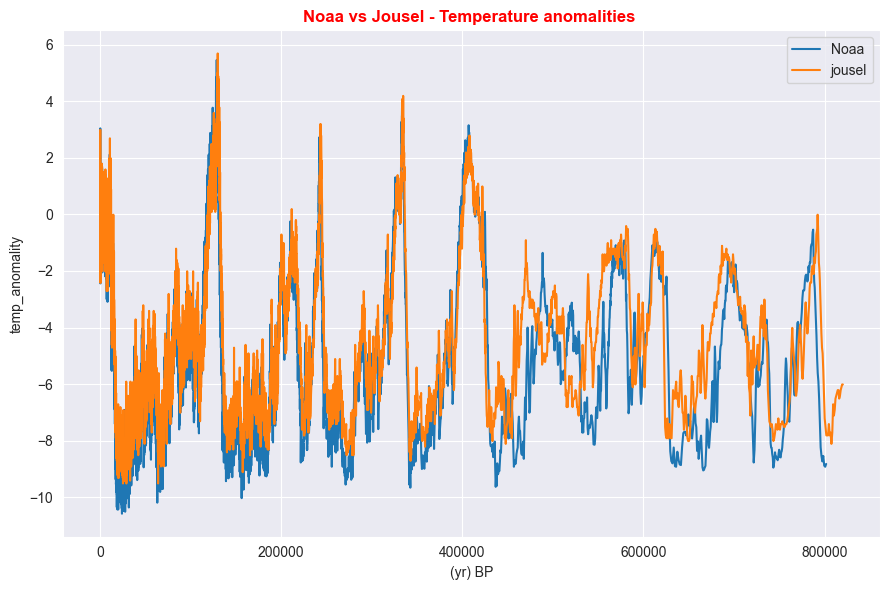

In [758]:
# plot the 2 dataset toghethere to determinate what to use 

# Set the size of the figure
plt.figure(figsize=(9, 6))

# Create the line plot for noaa temp data
sns.lineplot(x='ECD3_bp', y='temp_anomality', data=noaa_temperature, label='Noaa')

# Create the line plot for Bereiter data
sns.lineplot(x='ECD3_bp', y='temp_anomality', data=jouzel_temperature, label='jousel')

# Add labels and title
plt.xlabel('(yr) BP')
plt.ylabel('temp_anomality')
plt.title('Noaa vs Jousel - Temperature anomalities ', fontweight='bold', color='red')

# Add legend
plt.legend()

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()

Examining the below graph, it look both the dataset are similar unit 40000 yearf before present and after they show some discrepancies. 

I assume the discrepancy is due to the difficult to have accurate observation for acient time. 

Both the dataset has similar size but the noa dataset has data until the 1911, in opposite with the Jouzel dataset that has data until the year 2000. As the size of the 2 similar, and considering the first 40000 years before present have similar result, I have decided to keep the noa dataset, that show the anomalities already calculated and, due to that, is more realible, and add the year from 1911 to 2000 of the Jozel dataset. 

In [759]:
# define the jozel section to be appen 
jouzel_to_append = jouzel_temperature.loc[:11, ['Year', 'ECD3_bp', 'temp_anomality']]
jouzel_to_append

,Year,ECD3_bp,temp_anomality
0,2000,23.000000,0.888506
1,1993,29.440230,0.888506
2,1987,35.559810,0.888506
3,1981,41.358440,0.888506
4,1974,48.447220,0.888506
5,1967,55.215780,0.888506
6,1961,61.986950,0.888506
7,1953,69.729700,0.888506
8,1944,78.447842,0.888506
9,1936,86.529990,0.888506


In [760]:
# create the temperature dataset as fuse between the noaa and jouzel dataset 
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/

temp_anomality_df = pd.concat([noaa_temperature, jouzel_to_append], ignore_index=True, axis=0)

# sort bsed on year and reset index 
temp_anomality_df = temp_anomality_df.sort_values('Year', ascending=False).reset_index(drop=True)

In [761]:
temp_anomality_df.head(30)

,Year,ECD3_bp,temp_anomality
0,2000,23.000000,0.888506
1,1993,29.440230,0.888506
2,1987,35.559810,0.888506
3,1981,41.358440,0.888506
4,1974,48.447220,0.888506
5,1967,55.215780,0.888506
6,1961,61.986950,0.888506
7,1953,69.729700,0.888506
8,1944,78.447842,0.888506
9,1936,86.529990,0.888506


In [762]:
co2_df

,Year,ECD3_bp,CO2 (ppmv)
0,2022,1.000000,414.813239
1,2021,2.000000,412.712066
2,2020,3.000000,410.531603
3,2019,4.000000,407.994337
4,2018,5.000000,405.090357
...,...,...,...
1917,-801975,803998.284376,202.921723
1918,-802059,804082.870607,207.498645
1919,-802572,804595.674630,204.861938
1920,-803182,805205.442334,202.226839


In [763]:
co2_df

,Year,ECD3_bp,CO2 (ppmv)
0,2022,1.000000,414.813239
1,2021,2.000000,412.712066
2,2020,3.000000,410.531603
3,2019,4.000000,407.994337
4,2018,5.000000,405.090357
...,...,...,...
1917,-801975,803998.284376,202.921723
1918,-802059,804082.870607,207.498645
1919,-802572,804595.674630,204.861938
1920,-803182,805205.442334,202.226839


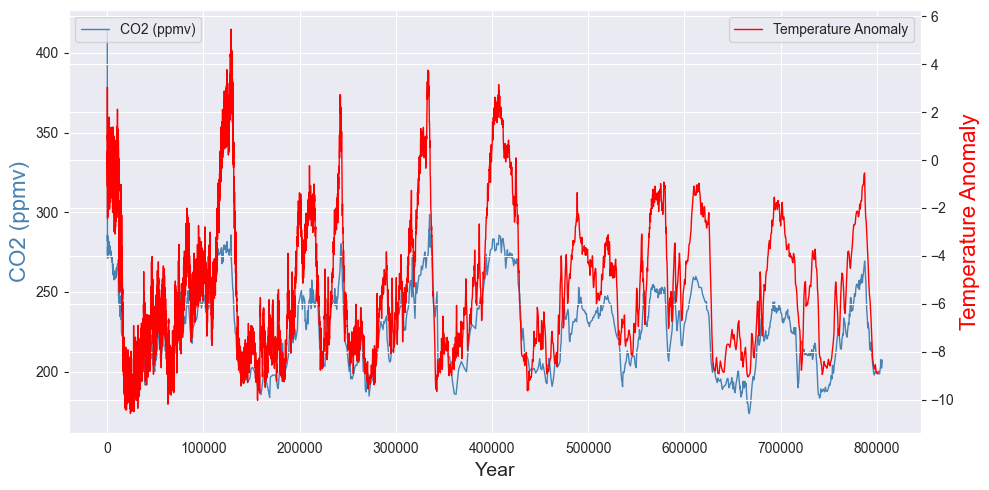

In [764]:
# Define colors to use
col1 = 'steelblue'
col2 = 'red'

# Define subplots with a larger figure size
fig, ax = plt.subplots(figsize=(10, 5))

# Add the first line to the plot with a thinner line and no markers
ax.plot(co2_df['ECD3_bp'], co2_df['CO2 (ppmv)'], color=col1, linewidth=1, label='CO2 (ppmv)')

# Add x-axis label
ax.set_xlabel('Year', fontsize=14)

# Add y-axis label for the first y-axis
ax.set_ylabel('CO2 (ppmv)', color=col1, fontsize=16)

# Create a legend for the first line
ax.legend(loc='upper left')

# Define the second y-axis that shares the x-axis with the current plot
ax2 = ax.twinx()

# Add the second line to the plot with a thinner line and no markers
ax2.plot(temp_anomality_df['ECD3_bp'], temp_anomality_df['temp_anomality'], color=col2, linewidth=1, label='Temperature Anomaly')

# Add y-axis label for the second y-axis
ax2.set_ylabel('Temperature Anomaly', color=col2, fontsize=16)

# Create a legend for the second line
ax2.legend(loc='upper right')

# Adjust layout to prevent clipping of labels
fig.tight_layout()

# Show the plot
plt.show()

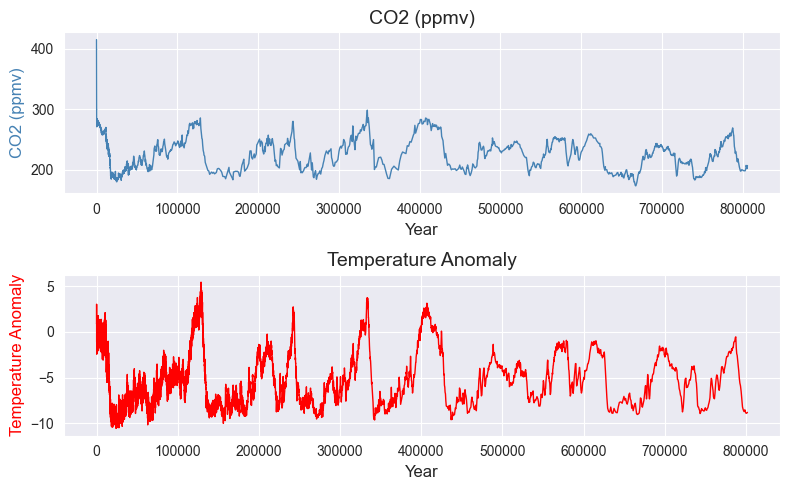

In [765]:
import matplotlib.pyplot as plt

# Define colors to use
col1 = 'steelblue'
col2 = 'red'

# Define subplots with a 2x1 grid and a smaller figure size
fig, axs = plt.subplots(2, 1, figsize=(8, 5))

# Plot the first line on the first subplot (axs[0])
axs[0].plot(co2_df['ECD3_bp'], co2_df['CO2 (ppmv)'], color=col1, linewidth=1)
axs[0].set_xlabel('Year', fontsize=12)
axs[0].set_ylabel('CO2 (ppmv)', color=col1, fontsize=12)
axs[0].set_title('CO2 (ppmv)', fontsize=14)

# Plot the second line on the second subplot (axs[1])
axs[1].plot(temp_anomality_df['ECD3_bp'], temp_anomality_df['temp_anomality'], color=col2, linewidth=1)
axs[1].set_xlabel('Year', fontsize=12)
axs[1].set_ylabel('Temperature Anomaly', color=col2, fontsize=12)
axs[1].set_title('Temperature Anomaly', fontsize=14)

# Adjust layout to prevent clipping of labels
fig.tight_layout()

# Show the plot
plt.show()

In [ ]:
#from scipy.stats import pearsonr

# Interpolate CO2 values to match the length of temp_anomality_df
#co2_interpolated = np.interp(temp_anomality_df['ECD3_bp'], co2_df['ECD3_bp'], co2_df['CO2 (ppmv)'])

# Use temp_anomality_df directly for temp_anomality values
#temp_values = temp_anomality_df['temp_anomality'].values

#correlation_coefficient, p_value = pearsonr(co2_interpolated, temp_values)

#print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
#print(f"P-value: {p_value}")

In [ ]:
# merge co2 and temperature dataset 
# group the co2_df dataset based on year to remove duplicate 
#co2_df = co2_df.groupby('Year')['CO2 (ppmv)'].mean().reset_index()
# group the temp_anomality_df dataset based on year to remove duplicate 
#temp_anomality_df = temp_anomality_df.groupby('Year')['temp_anomality'].mean().reset_index()

In [ ]:
# merge the co2 and temp dataset on "Year" performing a full join. This will create multiple nan
#co2_temp_composite = co2_df.merge(temp_anomality_df, how="outer", on='Year')
# recreate the column ECD3_bp for clarity
#co2_temp_composite['ECD3_bp'] = current_year - co2_temp_composite['Year']
# reorder columns
#co2_temp_composite = co2_temp_composite[['Year', 'ECD3_bp',	'CO2 (ppmv)', 'temp_anomality']]
# sort by year 
#co2_temp_composite = co2_temp_composite.sort_values('Year', ascending=False).reset_index(drop=True)